In [137]:
import json # only use json to easily open json file

Eigen geschreven functie om dot product (matrix multiplicatie) te berekenen voor matrices. De functie werkt met standaard matrices van lijsten, en niet met numpy arrays of matrices. Ik vond het volgende plaatje wat het proces aardig goed visualiseert:

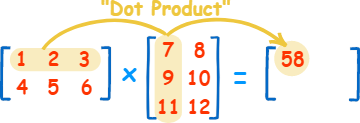
Bron: https://www.mathsisfun.com/algebra/matrix-multiplying.html

Hoe werkt dot product? Dot product kan 2 matrices met elkaar vermenigvuldigen van verschillende groottes. Er zit echter wel 1 belangrijke voorwaarde aan het bereken van de dot product matrix product. Het aantal kolommen van matrix 1 moet gelijk zijn aan het aantal rijen van matrix 2. Als dit het geval is kan dot product uitgevoerd worden. Ik vond het volgende plaatje wat ik het meest duidelijk vind weergeven hoe dot product berekend wordt. Er wordt een nieuwe matrix gemaakt met dimenties: 
- aantal rijen = aantal rijen matrix 1
- aantal kolommen = aantal kolommen matrix 2

Elke index waarde die voor de nieuwe matrix berekend moet worden kan op de volgende manier beschreven worden:
n is afhankelijk van de grootte van de matrices. A is matrix 1 en B is matrix 2.
$A1B1 + A2B2 + ... + AnBn$

bovenstaande berekening wordt voor elke rij in matrix 1 uitgevoerd.

In [138]:
# Function to perform matrix multiplication:
def dot_product(matrix1, matrix2):
    matrix1_rows = len(matrix1)
    matrix1_cols = len(matrix1[0])
    matrix2_rows = len(matrix2)
    matrix2_cols = len(matrix2[0])
    
    # if columns of first are not equal to rows of second, matrix multiplication is not possible
    if matrix1_cols != matrix2_rows: 
        raise Exception("Matrix multiplication is not possible because "+ str(matrix1_cols) +' != '+str(matrix2_rows))
    
    # create new empty productmatrix with size; rows of first and columns of second
    productmatrix = [[0 for row in range(matrix2_cols)] for col in range(matrix1_rows)]
    
    for i in range(matrix1_rows):
        for j in range(matrix2_cols):
            for h in range(matrix1_cols):
                productmatrix[i][j] += matrix1[i][h] * matrix2[h][j]
            
    return productmatrix

Om de gewichten uit de bestanden te lezen, is onderstaande functie geschreven. De functie is herbruikbaar voor oneindig aantal lagen. De functie leest de gewichten per laag uit het bestand en maakt van iedere laag een matrix met bijbehorende gewichten.

In [139]:
def weights_to_matrices(data):
    matrices = [] # empty list for all matrices
    
    for layer in data: # iterate over layers in json file

        matrix = [[0 for row in range(int(data[layer]["size_in"]))] for col in range(int(data[layer]["size_out"]))] 
        #empty matrix
        
        for index, node in enumerate(data[layer]["weights"]): # iterate over nodes in layer
            for weight in data[layer]["weights"][node]: # iterate over weights in node
                
                matrix[int(weight) - 1][int(node) - 1] = float(data[layer]["weights"][node][weight])
                # add weight to correct place in matrix
            
        matrices.append(matrix) # add matrix to all matrices
    
    return matrices

Om het resultaat van het neurale netwerk te berekenen moet in een bepaalde volgorde de matrix multiplicatie uitgevoerd worden. De volgorde is $Laag2 \cdot Laag1 \cdot Laag0 \cdot \vec{input}$ Door deze volgorde aan te houden (en dus van de laatste naar de eerste matrix toe te werken) kunnen eerst alle matrices met elkaar vermenigvuldigd worden, om als laatst het resultaat met de input vector te vermenigvuldigen. Als de lagen van het begin naar het einde worden afgewerkt, moeten er telkens een $\vec{tussenresultaat}$ met de volgende matrix vermenigvuldigd worden.

In [140]:
def ordered_matrix_multiplication(matrices, inputvector):
    
    if len(matrices) == 1: # if only 1 matrix in matrices:
        productvector = dot_product(matrices[0], inputvector) # multiply this matrix with input network

    else: # else iterate over reversed list matrices, while we know there must be more than 1 in matrices

        matrices.reverse() # reverse matrices to do L2 * L1 * L0... instead of L0 * L1 * L2

        for layer, matrix1 in enumerate(matrices):  # use layer as counting index

            if layer == 0: # if index = 0 multiply first two matrices with each other (we know it must be 2)
                productmatrix = dot_product(matrix1, matrices[layer + 1])

            elif layer + 1 == len(matrices): # else if all matrices are multiplied, multiply last product with input
                productvector = dot_product(productmatrix, inputvector) # perform dotproduct with productmatrix

            else: # else multiply all matrices with each other starting with productmatrix
                productmatrix = dot_product(productmatrix, matrices[layer + 1])

    return [round(i[0], 2) for i in productvector] # rounded values in productmatrix on 2 decimals

Als laatst worden de bestanden met lagen geopend en de functies gebruikt om:
- lagen in matrices te laden met de functie: weights_to_matrices
- matrices in de juiste volgorde te vermenigvuldigen met de functie: ordered_matrix_multiplication

Deze functie zorgt ervoor dat aan alle situaties gedacht is, en dat de inputvector altijd met het laatste resultaat van matrix multiplicatie vermenigvuldigd wordt. Als laatst wordt dit resultaat geprint!

In [141]:
# 1 layer
json_file = open("example-1layer.json", "r") # open json file in reading mode
data = json.load(json_file) # load json file in datastructure with json
# input vector
inputvector = [[1] for col in range(int(data["layer1"]["size_in"]))] # input for the neural network
matrices = weights_to_matrices(data) # load weights from file into matrices, for each layer 1 matrix
# will multiply matrices in reversed order. Last productmatrix will be multiplied with input vector
lastproduct = ordered_matrix_multiplication(matrices, inputvector) # this function ensures correct order of matrix multiplication
print("\nOutput values 1 layer:\n", lastproduct) # print output

# 2 layers
json_file = open("example-2layer.json", "r") # open json file in reading mode
data = json.load(json_file) # load json file in datastructure with json
# input vector
inputvector = [[1] for col in range(int(data["layer1"]["size_in"]))] # input for the neural network
matrices = weights_to_matrices(data) # load weights from file into matrices, for each layer 1 matrix
# will multiply matrices in reversed order. Last productmatrix will be multiplied with input vector
lastproduct = ordered_matrix_multiplication(matrices, inputvector) # this function ensures correct order of matrix multiplication
print("\nOutput values 2 layers:\n", lastproduct) # print output

# 3 layers
json_file = open("example-3layer.json", "r") # open json file in reading mode
data = json.load(json_file) # load json file in datastructure with json
# input vector
inputvector = [[1] for col in range(int(data["layer1"]["size_in"]))] # input for the neural network
matrices = weights_to_matrices(data) # load weights from file into matrices, for each layer 1 matrix
# will multiply matrices in reversed order. Last productmatrix will be multiplied with input vector
lastproduct = ordered_matrix_multiplication(matrices, inputvector) # this function ensures correct order of matrix multiplication
print("\nOutput values 3 layers:\n", lastproduct) # print output


Output values 1 layer:
 [0.5, -0.3, 0.2, 0.5]

Output values 2 layers:
 [0.62, 0.36]

Output values 3 layers:
 [0.38]


Ik heb hier nog toegevoegd hoe een outputvector steeds gebruikt kan worden om met de volgende laag de ouput te berekenen. Ik vind het wel dubbel, en enigzins onzin, aangezien eerst juist verteld werd dat dit niet gebruikt mocht worden (ik had eerst mijn opdracht met vector output multiplicatie uitgewerkt). Maar alsnog opnieuw uitgewerkt bij deze:

In [142]:
def ordered_vectoroutput_multiplication(matrices, inputvector):
    
    if len(matrices) == 1: # if only 1 matrix in matrices:
        productvector = dot_product(matrices[0], inputvector) # multiply this matrix with input network

    else: # else iterate over reversed list matrices, while we know there must be more than 1 in matrices

        for layer, matrix1 in enumerate(matrices):  # use layer as counting index

            if layer == 0: # if index = 0 multiply first two matrices with each other (we know it must be 2)
                productvector = dot_product(matrix1, inputvector)

            elif layer + 1 == len(matrices): # else if all matrices are multiplied, multiply last product with input
                productvector = dot_product(matrices[layer], productvector) # perform dotproduct with productmatrix

            else: # else multiply all matrices with each other starting with productmatrix
                productvector = dot_product(matrices[layer], productvector)

    return [round(i[0], 2) for i in productvector] # rounded values in productmatrix on 2 decimals

In [143]:
# 1 layer
json_file = open("example-1layer.json", "r") # open json file in reading mode
data = json.load(json_file) # load json file in datastructure with json
# input vector
inputvector = [[1] for col in range(int(data["layer1"]["size_in"]))] # input for the neural network
matrices = weights_to_matrices(data) # load weights from file into matrices, for each layer 1 matrix
# will multiply matrices in reversed order. Last productmatrix will be multiplied with input vector
lastproduct = ordered_vectoroutput_multiplication(matrices, inputvector) # this function ensures correct order of matrix multiplication
print("\nOutput values 1 layer:\n", lastproduct) # print output

# 2 layers
json_file = open("example-2layer.json", "r") # open json file in reading mode
data = json.load(json_file) # load json file in datastructure with json
# input vector
inputvector = [[1] for col in range(int(data["layer1"]["size_in"]))] # input for the neural network
matrices = weights_to_matrices(data) # load weights from file into matrices, for each layer 1 matrix
# will multiply matrices in reversed order. Last productmatrix will be multiplied with input vector
lastproduct = ordered_vectoroutput_multiplication(matrices, inputvector) # this function ensures correct order of matrix multiplication
print("\nOutput values 2 layers:\n", lastproduct) # print output

# 3 layers
json_file = open("example-3layer.json", "r") # open json file in reading mode
data = json.load(json_file) # load json file in datastructure with json
# input vector
inputvector = [[1] for col in range(int(data["layer1"]["size_in"]))] # input for the neural network
matrices = weights_to_matrices(data) # load weights from file into matrices, for each layer 1 matrix
# will multiply matrices in reversed order. Last productmatrix will be multiplied with input vector
lastproduct = ordered_vectoroutput_multiplication(matrices, inputvector) # this function ensures correct order of matrix multiplication
print("\nOutput values 3 layers:\n", lastproduct) # print output


Output values 1 layer:
 [0.5, -0.3, 0.2, 0.5]

Output values 2 layers:
 [0.62, 0.36]

Output values 3 layers:
 [0.38]
